In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define the main function that optimizes a given function
def MFO(nsa, dim, ub, lb, max_iter, fobj):
# def MFO(nsa, dim, ub, lb, shift, max_iter, fobj):
    ''' Main function
    Parameters :
    - nsa : Number of Search Agents  飞蛾数量，即位置矩阵的行数
    - dim : Dimension of Search Space 需要寻优参数的个数，即位置矩阵的列数
    - ub : Upper Bound
    - lb : Lower Bound
    - max_iter : Number of Iterations 迭代次数
    - fobj : Objective Function (Fitness Function) 适应度函数
    Returns :
    - bFlameScore : Best Flame Score   最好的结果得分  适应度函数值最小
    - bFlamePos : Best Flame Position  最好的结果      适应度函数值最小时对应的位置
    - ConvergenceCurve : Evolution of the best Flame Score on every iteration 全局最优
    '''

    # Initialize the positions of moths
    mothPos = np.random.uniform(low=lb, high=ub, size=(nsa, dim))  # + np.ones((nsa, dim))*shift 随机生成的飞蛾位置

    convergenceCurve = np.zeros(shape=(max_iter))#保存每一次迭代过程中最优火焰的得分

    # print("Optimizing  \"" + fobj.__name__ + "\"")

    for iteration in range(max_iter):  # Main loop
        # Number of flames Eq. (3.14) in the paper
        flameNo = int(np.ceil(nsa-(iteration+1)*((nsa-1)/max_iter)))#随着迭代，火焰数量减少 np.ceil(相当于round)计算大于等于该值的最小整数
                                                                     #每迭代一次，火焰的数量减少1
        # Check if moths go out of the search space and bring them back
        mothPos = np.clip(mothPos, lb, ub)

        # Calculate the fitness of moths
        mothFit = fobj(mothPos)#mothFit记录所有飞蛾的适应度值

        if iteration == 0:#第一次迭代，火焰的位置就是最优适应度飞蛾的位置，火焰适应度等于最优飞蛾适应度
            # Sort the first population of moths
            order = mothFit.argsort(axis=0)#从小到大排序，返回其索引   返回函数值从小到大的索引
            mothFit = mothFit[order]#个体适应度最小                    此处是函数值从小到大排序
            mothPos = mothPos[order, :]#适应度最小的飞蛾位置           将位置也按上述法则排序

            # Update the flames
            bFlames = np.copy(mothPos)#火焰即飞蛾的当前最优值
            bFlamesFit = np.copy(mothFit)

        else:
            # Sort the moths
            doublePop = np.vstack((bFlames, mothPos))#按行堆叠数组
            doubleFit = np.hstack((bFlamesFit, mothFit))#按列堆叠

            order = doubleFit.argsort(axis=0)#将飞蛾和火焰的适应度进行排序，返回其索引
            doubleFit = doubleFit[order]
            doublePop = doublePop[order, :]

            # Update the flames
            bFlames = doublePop[:nsa, :]
            bFlamesFit = doubleFit[:nsa]

        # Update the position best flame obtained so far
        bFlameScore = bFlamesFit[0]
        bFlamesPos = bFlames[0, :]

        # a linearly dicreases from -1 to -2 to calculate t in Eq. (3.12)  a对应论文中的r 
        a = -1 + (iteration+1) * ((-1)/max_iter)

        # D in Eq. (3.13)
        distanceToFlames = np.abs(bFlames - mothPos)#飞蛾和火焰的距离

        b = 1
        t = (a-1)*np.random.rand(nsa, dim) + 1#公式（3.12）中的t
        ''' Update the position of the moth with respect to its corresponding
        flame if the moth position is less than the number of flames
        calculated, otherwise update the position of the moth with respect
        to the last flame '''
        temp1 = bFlames[:flameNo, :]
        temp2 = bFlames[flameNo-1, :]*np.ones(shape=(nsa-flameNo, dim))
        temp2 = np.vstack((temp1, temp2))
        mothPos = distanceToFlames*np.exp(b*t)*np.cos(t*2*np.pi) + temp2

        convergenceCurve[iteration] = bFlameScore

    return bFlameScore, bFlamesPos, convergenceCurve

In [3]:
#Defining the objective function
def F1(x):
    ''' F1 function as defined in the paper for the test '''
    return np.sum(np.power(x, 2), axis=1)


def F2(x):
    ''' F2 function as defined in the paper for the test '''
    return np.sum(np.abs(x), axis=1) + np.prod(np.abs(x), axis=1)


def F3(x):
    ''' F3 function as defined in the paper for the test '''
    o = 0
    for i in range(x.shape[1]):
        o += np.power(np.sum(x[:, :i], axis=1), 2)
    return o


def F4(x):
    ''' F4 function as defined in the paper for the test '''
    return np.max(x, axis=1)


def F5(x):
    ''' F5 function as defined in the paper for the test '''
    o = 0
    for i in range(x.shape[1]-1):
        o += 100*np.power((x[:, i+1] - np.power(x[:, i], 2)), 2) + np.power(x[:, i] - 1, 2)
    return o

def F6(x):
    ''' F6 function as defined in the paper for the test '''
    return np.sum(np.power(x+0.5, 2), axis=1)


def F7(x):
    ''' F7 function as defined in the paper for the test '''
    n = np.arange(1, x.shape[1]+1, 1)
    return np.sum(n*np.power(x, 4), axis=1) + np.random.rand(x.shape[0])

0.004402019875425082 
 [ 0.06516108  0.04571569  0.12512501  0.07557576  0.06486318 -0.03983016
  0.12364515  0.0385569  -0.10400607  0.0693146 ]


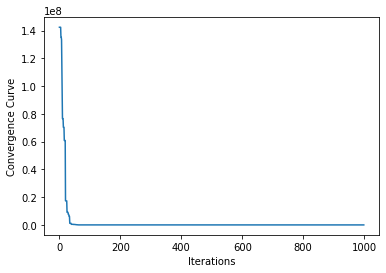

In [12]:
#Testing the optimization function
nsa = 30
max_iter = 1000

lb = -100
ub = 100
dim = 10
# shift = -30

bFlameScore, bFlamesPos, convergenceCurve = MFO(
    nsa, dim, ub, lb, max_iter, F7)
print(bFlameScore, '\n', bFlamesPos)
x = np.arange(0, convergenceCurve.shape[0], 1)#每次迭代都有一个最优适应度
plt.plot(x, convergenceCurve)
plt.xlabel('Iterations')
plt.ylabel('Convergence Curve')
plt.show()

In [21]:
convergenceCurve

array([1.53839876e+04, 1.53839876e+04, 1.53839876e+04, 1.53839876e+04,
       1.27366894e+04, 1.19644545e+04, 1.19644545e+04, 1.19644545e+04,
       9.54889154e+03, 9.08510483e+03, 8.53598813e+03, 8.53598813e+03,
       7.38987672e+03, 7.38987672e+03, 7.38987672e+03, 4.94135209e+03,
       3.69843195e+03, 3.63309670e+03, 2.84853777e+03, 2.84853777e+03,
       2.84853777e+03, 2.84853777e+03, 2.69987693e+03, 1.58207821e+03,
       1.58207821e+03, 1.41677551e+03, 1.41677551e+03, 1.14606085e+03,
       9.79794345e+02, 9.79794345e+02, 9.79794345e+02, 9.79794345e+02,
       9.79794345e+02, 8.74451344e+02, 8.74451344e+02, 8.34063314e+02,
       8.34063314e+02, 8.34063314e+02, 6.22497105e+02, 6.22497105e+02,
       6.22497105e+02, 6.22497105e+02, 6.22497105e+02, 5.86776088e+02,
       4.64623933e+02, 4.64623933e+02, 4.57176765e+02, 3.84406992e+02,
       3.84406992e+02, 3.15860801e+02, 3.15860801e+02, 3.15860801e+02,
       3.15860801e+02, 3.15860801e+02, 3.15860801e+02, 3.15860801e+02,
      

Mean : 1.5407439555097887e-32
Standard deviation : 8.268499729060318e-33


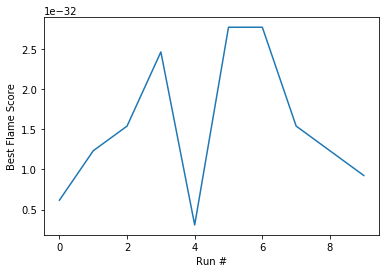

In [5]:
#对算法进行多次测试，并打印结果的平均值和标准偏差
nsa = 30
max_iter = 1000

lb = -100
ub = 100
dim = 10

bFlameScore = np.zeros(10)
for i in range(10):
    bFlameScore[i], _, _ = MFO(nsa, dim, ub, lb, max_iter, F6)

print('Mean :', np.mean(bFlameScore))
print('Standard deviation :', np.std(bFlameScore))

x = np.arange(0, 10, 1)
plt.plot(x, bFlameScore)
plt.xlabel('Run #')
plt.ylabel('Best Flame Score')
plt.show()